# Loading the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import string

In [6]:
import warnings

# Reading the Data

In [7]:
contest = pd.read_csv('./contest_data.csv',
                 dtype={'contest_key': np.int32},
                 parse_dates=['date'])

In [8]:
chicken = pd.read_csv('./results_chicken.csv',
                         dtype={'contest_key': np.int32, 'place': np.int32})
ribs = pd.read_csv('./results_ribs.csv',
                         dtype={'contest_key': np.int32, 'place': np.int32})
pork = pd.read_csv('./results_pork.csv',
                         dtype={'contest_key': np.int32, 'place': np.int32})
brisk = pd.read_csv('./results_brisket.csv',
                         dtype={'contest_key': np.int32, 'place': np.int32})
overall = pd.read_csv('./results_overall.csv',
                         dtype={'contest_key': np.int32, 'place': np.int32})

# Storing the Results into a Dictionary

In [9]:
cat_dict = {"chicken": chicken, 
            "ribs": ribs, 
            "pork": pork, 
            "brisket": brisk, 
            "overall": overall}

print("Ready to go!")

Ready to go!


# Contests Dataframe

In [10]:
print("Columns: " + str(list(contest.columns)) + "\n")
print("Number of rows " + str(contest.shape[0]) + "\n")

Columns: ['contest_key', 'date', 'title', 'location_str', 'city', 'state', 'state_full', 'prize', 'cbj_percentage', 'is_championship', 'is_standard', 'url']

Number of rows 1559



In [11]:
contest.head(10)

,contest_key,date,title,location_str,city,state,state_full,prize,cbj_percentage,is_championship,is_standard,url
0,1,2013-07-19,"Wine, Brew & Bar-B-Que Too!","New Palestine, IN",New Palestine,IN,Indiana,10000.0,NaN,True,False,http://www.kcbs.us/event/4163/wine-brew-bar-b-...
1,2,2013-07-19,Griller's Cup,"Laramie, WY",Laramie,WY,Wyoming,7000.0,100.0,True,False,http://www.kcbs.us/event/3926/grillers-cup
2,3,2013-07-19,Smoke on the Mountain - VA State BBQ Championship,"Galax, VA",Galax,VA,Virginia,4100.0,100.0,True,True,http://www.kcbs.us/event/4367/smoke-on-the-mou...
3,4,2013-07-19,"Blues, BBQ & Bargains","Hays, KS",Hays,KS,Kansas,7500.0,74.0,True,False,http://www.kcbs.us/event/3860/blues-bbq-bargains
4,5,2013-07-19,BBQ'Loo & Blues Too!,"Waterloo, IA",Waterloo,IA,Iowa,10000.0,100.0,True,True,http://www.kcbs.us/event/4044/bbqloo-blues-too
5,6,2013-07-19,Cookin' on Kampeska: Wing Fling & BBQ Thing,"Watertown, SD",Watertown,SD,South Dakota,8175.0,100.0,True,True,http://www.kcbs.us/event/4054/cookin-on-kampes...
6,7,2013-07-19,Taste of Grand Rapids,"Comstock Park, MI",Comstock Park,MI,Michigan,6350.0,100.0,True,False,http://www.kcbs.us/event/4309/taste-of-grand-r...
7,8,2013-07-19,RiverFest Red White and Que,"Bellevue, NE",Bellevue,NE,Nebraska,7000.0,95.0,True,True,http://www.kcbs.us/event/4303/riverfest-red-wh...
8,9,2013-07-19,9th Annual WildBlue BBQ,"Burlington, KS",Burlington,KS,Kansas,7130.0,94.0,True,False,http://www.kcbs.us/event/4062/9th-annual-wildb...
9,10,2013-07-19,Warren All American BBQ Festival,"Warren, PA",Warren,PA,Pennsylvania,3000.0,100.0,True,True,http://www.kcbs.us/event/3889/warren-all-ameri...


# Looking at the Ribs

In [12]:
print("Columns: " + str(list(ribs.columns)) + "\n")
print("Number of rows " + str(ribs.shape[0]) + "\n")
print("First 5 rows: \n")
print("Average number of ribs submissions per tournament: " + str(int(ribs.shape[0] / contest.shape[0])))

Columns: ['contest_key', 'place', 'score', 'team_name']

Number of rows 61256

First 5 rows: 

Average number of ribs submissions per tournament: 39


In [13]:
ribs.head(10)

,contest_key,place,score,team_name
0,1,1,177.1544,ALL IN QUE
1,1,2,175.4172,THUNDER HOG BBQ
2,1,3,173.7028,BLUE CHIP BBQ
3,1,4,172.5944,ROB-A-QUE
4,1,5,172.5600,ONE2BBQ
5,1,6,171.4516,MONTY PIGTHON & THE HOLY GRILL
6,1,7,170.2628,SQUEALERS AWARD WINNING BARBEQUE
7,1,8,169.1084,WARREN COUNTY PORK CHOPPERS
8,1,9,168.5600,Here for the Beer
9,1,10,167.9772,HOOSIER MARKET BARBEQUE


# Filtering by State

In [14]:
# function to aggregate all the scores for a given state within a given category
def get_state_cat_results(state, category):
    keys = contest[contest['state'] == state]['contest_key']
    categorical = cat_dict[category].copy()
    categorical = categorical[categorical['contest_key'].isin(keys)]
    return categorical

# Tenneessee as an Example

Tennessee chicken score stats:


count    2889.000000
mean      167.627046
std         8.542155
min        20.000000
25%       163.942800
50%       169.108400
75%       173.120000
max       180.000000
Name: score, dtype: float64

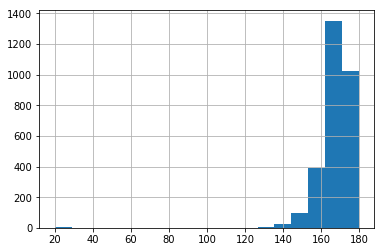

In [15]:
tn_chicken = get_state_cat_results("TN", "chicken")
tn_chicken_scores = tn_chicken['score']
print("Tennessee chicken score stats:")
# plot a histogram
plt.figure()
bin_count = int(tn_chicken_scores.max() / 10)
_ = tn_chicken_scores.hist(bins=bin_count)
tn_chicken_scores.describe()

# Looking at California

California chicken score stats:


count    3635.000000
mean      163.103354
std        12.682944
min        20.000000
25%       158.234200
50%       165.668400
75%       170.840000
max       180.000000
Name: score, dtype: float64

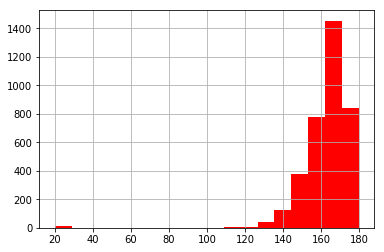

In [16]:
ca_chicken = get_state_cat_results("CA", "chicken")
ca_chicken_scores = ca_chicken['score']
print("California chicken score stats:")
# plot a histogram
plt.figure()
bin_count = int(ca_chicken_scores.max() / 10)
_ = ca_chicken_scores.hist(bins=bin_count, color = 'red')
ca_chicken_scores.describe()

# Filtering by Year and Plotting the CDF

In [17]:
# function to aggregate all the scores for a given year within a given category
def get_year_cat_results(year, category):
    keys = contest[contest['date'].dt.year == year]['contest_key']
    categorical = cat_dict[category].copy()
    categorical = categorical[categorical['contest_key'].isin(keys)]
    return categorical
    
# function to plot each subset's cumulative distribution function
def plot_year_cdfs(years, category, lower_score_bound=0):
    plt.figure()
    for year in years:
        # subset the results data
        contest = get_year_cat_results(year, category)
        score = contest['score']
        # filter low scores
        score = score[score >= lower_score_bound]
        # plot CDF
        x = np.sort(score)
        y = np.arange(1, score.size + 1) / float(x.size)
        plt.plot(x, y)
    # label plot
    plt.title("CDF of Yearly " + category.title() + " Scores")
    plt.xlabel("scores")
    plt.ylabel("probability")
    plt.legend(years, loc='best')

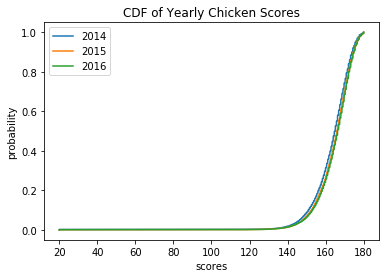

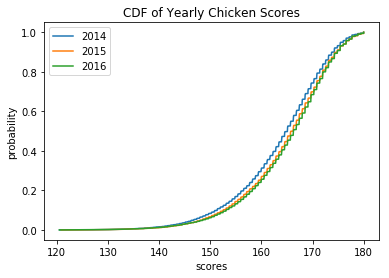

In [18]:
years = [2014, 2015, 2016]
category = "chicken"
plot_year_cdfs(years, category)
plot_year_cdfs(years, category, lower_score_bound=120)

# Comparing the Score Distributions Across States

In [19]:
# Taking the top n states by number of contests:
top_n = 5
counts = contest['state'].value_counts()
states = list(counts.head(top_n).index)
# states = ['MA', 'NY', 'NH']

print(states)

['MO', 'KS', 'CA', 'GA', 'TN']


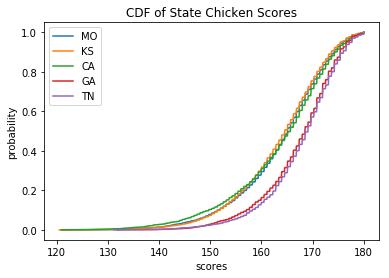

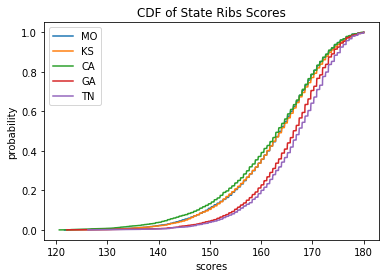

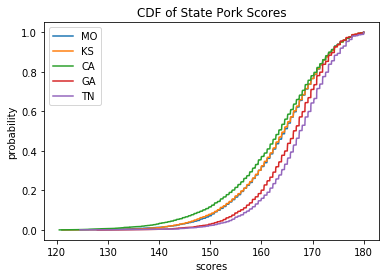

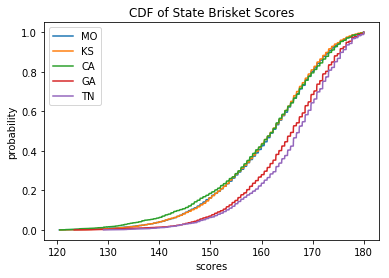

In [20]:
# plot each subset's cumulative distribution function
def plot_state_cdfs(states, category, lower_score_bound=0):
    plt.figure()
    for state in states:
        # subset the results data
        contest = get_state_cat_results(state, category)
        score = contest['score']
        # filter low scores
        score = score[score >= lower_score_bound]
        # plot CDF
        x = np.sort(score)
        y = np.arange(1, score.size + 1) / float(x.size)
        plt.plot(x, y)
    # label plot
    plt.title("CDF of State " + category.title() + " Scores")
    plt.xlabel("scores")
    plt.ylabel("probability")
    plt.legend(states, loc='best')

plot_state_cdfs(states, "chicken", lower_score_bound=120)
plot_state_cdfs(states, "ribs", lower_score_bound=120)
plot_state_cdfs(states, "pork", lower_score_bound=120)
plot_state_cdfs(states, "brisket", lower_score_bound=120)


# Looking at the Prize Money

In [21]:
# get a list of the states in the data set (AK, HI, and ND are missing)
states = list(contest['state'].unique())
# create a template row for the state stats data frame
row_temp = {"total_prize": "NA", 
            "avg_prize": "NA",
            "count": "NA",
            "count_prized": "NA"}
# create a dataframe to hold the results
prize_df = pd.DataFrame(index=states, columns=row_temp.keys())

# iterate the state subsets to calculate total, average and percentage prized
for cur_state in states:
    row_new = row_temp.copy()
    prizes = contest[contest['state'] == cur_state]['prize']
    count_total = prizes.shape[0]
    # remove non-prized competitions
    prizes = prizes[prizes > 0]
    count_prized = prizes.shape[0]
    # calculate measures
    row_new['total_prize'] = prizes.sum()
    row_new['avg_prize'] = prizes.mean()
    row_new['count'] = count_total
    row_new['count_prized'] = count_prized
    # insert row into the results df
    prize_df.loc[cur_state] = row_new
prize_df['percent_prized'] = prize_df['count_prized'] / prize_df['count']

# function to plot measures in the prize dataframe
def prizeplot(prize_df, col, n, title, y_units):
    plt.figure()
    prize_df = prize_df.sort_values(by=col, ascending=False)
    prize_df = prize_df.head(n)
    prize_df[col].plot.bar()
    plt.title(title.title())
    plt.xlabel('State Abbrev.')
    plt.ylabel(y_units.title())

print("Total prize across the dataset: $" + str(contest['prize'].sum()))


Total prize across the dataset: $14111822.0


# Visualizing the Prizes

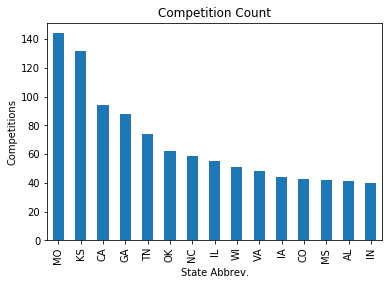

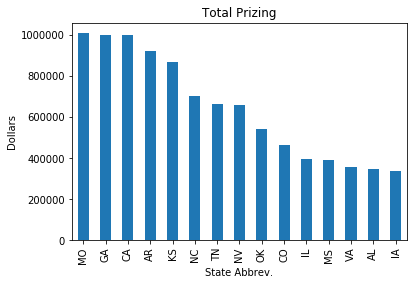

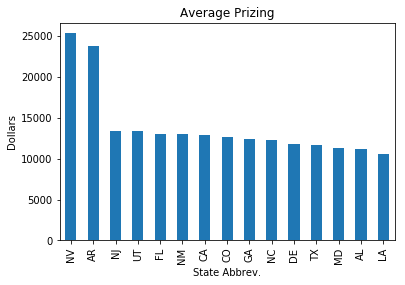

In [22]:
n = 15
prizeplot(prize_df, 'count', n, 'competition count', 'competitions')
prizeplot(prize_df, 'total_prize', n, 'total prizing', 'dollars')
prizeplot(prize_df, 'avg_prize', n, 'average prizing', 'dollars')

Missouri has the highest competition count and total prizes that are being awarded for the barbeque competitions.

# Best Teams

In [23]:
# define a string series regularizing function
def tame_names(str_series):
    str_series = str_series.str.translate(str.maketrans('', '', string.punctuation))
    str_series = str_series.str.lower()
    str_series = str_series.str.strip()
    return str_series

# standardize team names for use as comparators
for cat in cat_dict.keys():
    cat_dict[cat]['std_name'] = tame_names(cat_dict[cat]['team_name'])

# define a function to calculate highest average score for teams with 
# more than some minimum of appearences
def extract_best(category, min_appearances):
    cat_df = cat_dict[category]
    # filter the results table to only include teams that satisfy min_appearences
    team_apps = cat_df['std_name'].value_counts()
    teams = list(team_apps[team_apps >= min_appearances].index)
    cat_df = cat_df[cat_df['std_name'].isin(teams)]
    # iterate the candidate teams and calculate mean scores
    cand_teams = list(cat_df['std_name'].unique())
    row_temp = {'appearances': 0, 'score_avg': 0, 'score_std': 0}
    best_df = pd.DataFrame(index=cand_teams, columns=row_temp.keys())
    for team in list(cat_df['std_name'].unique()):
        row_new = row_temp.copy()
        scores = cat_df[cat_df['std_name'] == team]['score']
        row_new['appearances'] = scores.shape[0]
        row_new['score_avg'] = scores.mean()
        row_new['score_std'] = scores.std()
        best_df.loc[team] = row_new
    best_df = best_df.sort_values(by="score_avg", ascending=False)
    return best_df

min_apps = 10
chick_best = extract_best("chicken", min_apps)
ribs_best = extract_best("ribs", min_apps)
pork_best = extract_best("pork", min_apps)
brisk_best = extract_best("brisket", min_apps)

print("Finished computing.")

Finished computing.


In [24]:
print("Top 10 teams in Chicken:")
chick_best.head(10)

Top 10 teams in Chicken:


,appearances,score_avg,score_std
fire dancer bbq,93,173.828,3.89276
moyers competition barbq team,51,173.773,3.30248
south pork,84,173.613,3.57526
smoke me silly,114,173.437,4.55644
double duece smokin bbq,11,173.341,4.03058
caveman cuisine,78,173.127,4.77415
rocky top barbeque,44,173,4.36826
checkered pig,86,172.992,4.04743
hot coles bbq,34,172.989,4.58406
bad moon smokin,27,172.981,4.39908


In [25]:
print("Top 10 teams in Ribs:")
ribs_best.head(10)

Top 10 teams in Ribs:


,appearances,score_avg,score_std
smokin n the dark,11,172.923,4.12902
hog tide barbque,84,172.799,4.82496
warren county pork choppers,104,172.26,4.61023
music city bbq,18,172.239,5.92345
smoke me silly,114,172.223,4.54368
clark crew bbq,107,172.188,5.09371
okieq,36,171.931,4.02434
jobawbs bbq,86,171.849,4.45251
phat jacks bbq ne,18,171.679,4.71792
killer bs bbq,67,171.677,4.34397


In [26]:
print("Top 10 teams in Pork:")
pork_best.head(10)

Top 10 teams in Pork:


,appearances,score_avg,score_std
kosmosqcom,15,173.278,3.80709
gque,33,172.595,4.26797
prime bbq,12,172.514,4.52359
clark crew bbq,107,172.343,5.33034
porterhouse bbq,45,172.257,5.24604
warren county pork choppers,104,172.24,4.2621
soggy bottom smokers,27,172.215,3.09942
killer hogs,66,172.189,4.61968
ktown daddys bbq,30,172.1,4.75364
qbones bbq,53,172.055,3.85512


In [27]:
print("Top 10 teams in Brisket:")
brisk_best.head(10)

Top 10 teams in Brisket:


,appearances,score_avg,score_std
bayou boogie bbq,44,173.888,3.9101
iowas smokey ds bbq,119,173.851,4.56367
rescue smokers,12,173.13,4.15912
curly tails bbq,18,173.067,3.72367
high on the hawg,40,173.043,4.33716
big tz q cru,56,172.82,4.14422
swine dining ga,11,172.816,5.74851
ash kickers bbq,11,172.774,4.17883
warren county pork choppers,104,172.72,4.45659
moyers competition barbq team,51,172.66,4.91542


# Let's Check if everything is all good.

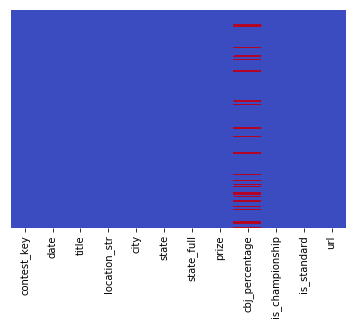

In [28]:
sns.heatmap(contest.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

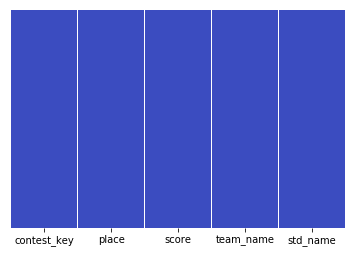

In [29]:
sns.heatmap(chicken.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

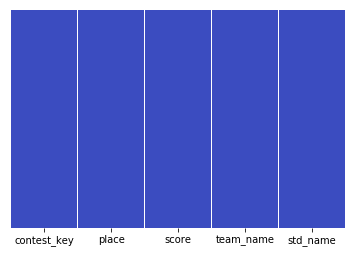

In [30]:
sns.heatmap(ribs.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

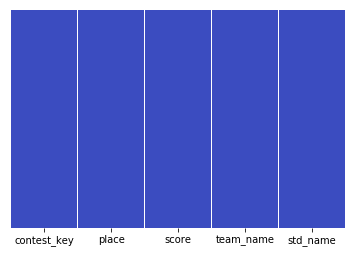

In [31]:
sns.heatmap(pork.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

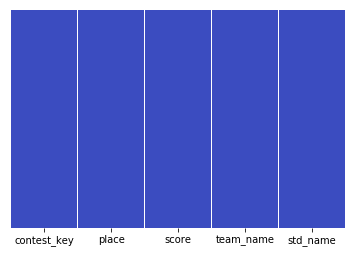

In [32]:
sns.heatmap(brisk.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

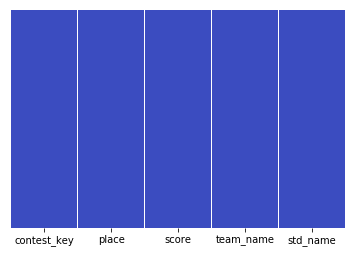

In [33]:
sns.heatmap(overall.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Looks good. cbj_percentage isn't really much of a factor as much though for one set of data. 